<h1><font color="purple" size="4"> Clustering of countries based on socio-economic and health factors </font></h1>

In [1]:
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For scaling the data
from sklearn.preprocessing import scale

# To perform K-means clustering
from sklearn.cluster import KMeans

# To perform PCA
from sklearn.decomposition import PCA



In [2]:
#Reaidng the Dataset 
Country_data=pd.read_csv("C:/Users/Hxtreme/Documents/SEM 4/predictive analytics lab/project/Country-data.csv")


In [3]:
#Reading the first 5 rows of the dataset
Country_data.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
Country_data['exports'] = Country_data['exports']*Country_data['gdpp']/100
Country_data['imports'] = Country_data['imports']*Country_data['gdpp']/100
Country_data['health'] = Country_data['health']*Country_data['gdpp']/100


In [5]:
Country_data.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [6]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
Country_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


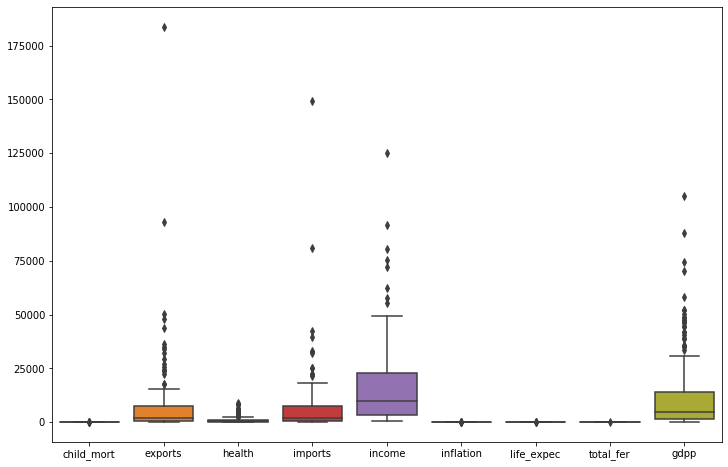

In [7]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=Country_data)
plt.show()


In [8]:
print("The number of countries are : ",Country_data.shape[0])


The number of countries are :  167


In [9]:
Country_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [10]:
Country_data.isnull().sum()


country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [13]:
Country_data.isna().sum()


country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

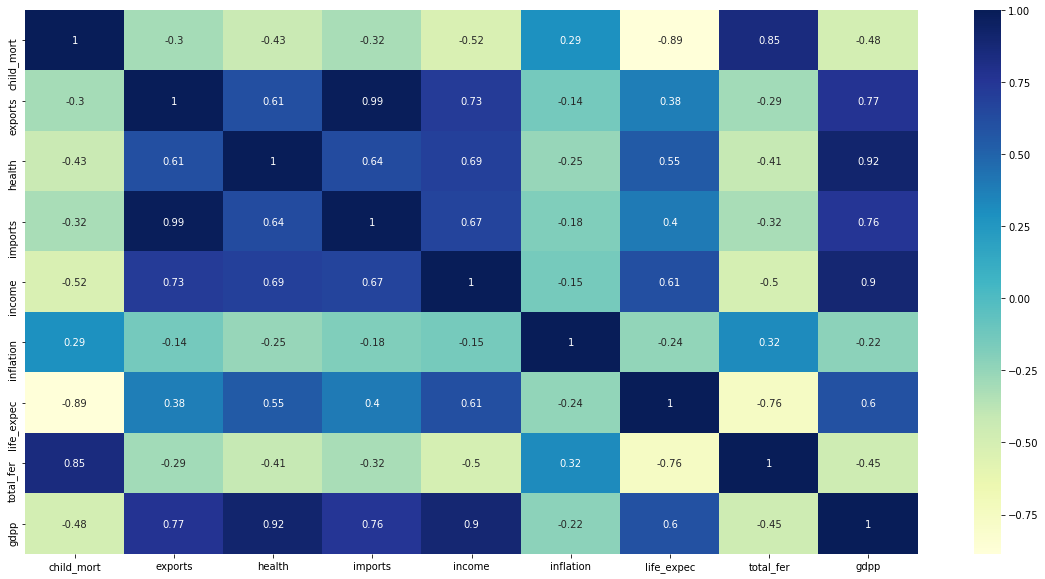

In [14]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(Country_data.corr(),cmap='YlGnBu',annot = True)
plt.show()


In [13]:
## First let us see if we can explain the dataset using fewer variables
from sklearn.preprocessing import StandardScaler
Country_data1=Country_data.drop('country',1)   ## Droping string feature country name.
standard_scaler = StandardScaler()
Country_scaled = standard_scaler.fit_transform(Country_data1)


In [14]:
pca = PCA(svd_solver='randomized', random_state=42)

# fiting PCA on the dataset
pca.fit(Country_scaled)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [15]:
pca.components_


array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [16]:
pca.explained_variance_ratio_


array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

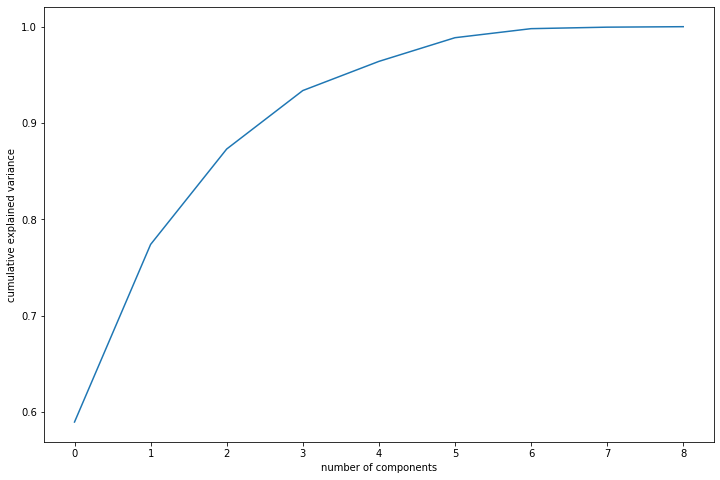

In [17]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


In [18]:
colnames = list(Country_data1.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                      'PC4':pca.components_[3],'PC5':pca.components_[4]})
pcs_df


,Feature,PC1,PC2,PC3,PC4,PC5
0,child_mort,-0.316392,0.476267,-0.150012,-0.148052,0.101995
1,exports,0.342887,0.397311,-0.030574,0.449425,-0.038538
2,health,0.358535,0.155053,-0.075703,-0.599712,-0.493200
3,imports,0.344865,0.370781,-0.072174,0.461798,-0.252787
4,income,0.380041,0.128384,0.145764,-0.154806,0.794075
5,inflation,-0.143085,0.221261,0.948419,-0.007628,-0.136423
6,life_expec,0.343857,-0.369820,0.196752,-0.018395,-0.154041
7,total_fer,-0.302842,0.459715,-0.077834,-0.213928,-0.020336
8,gdpp,0.399988,0.200624,0.010339,-0.364772,0.087501


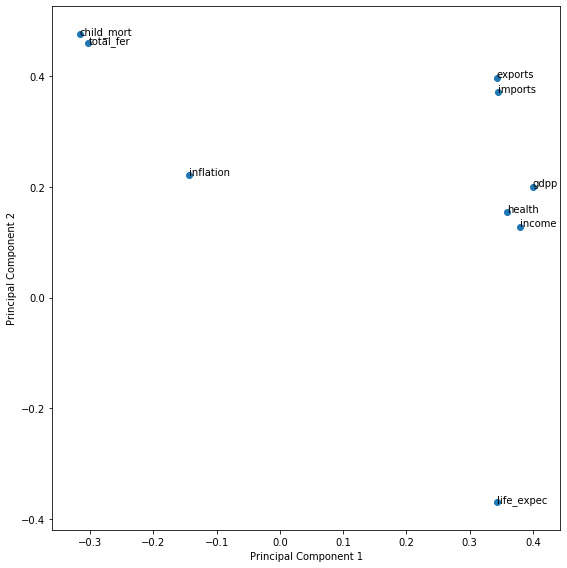

In [19]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()


In [20]:
#Finally let's go ahead and do dimenstionality reduction using the four Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

df_pca = pca_final.fit_transform(Country_scaled)
df_pca.shape


(167, 5)

In [21]:
pc = np.transpose(df_pca)


In [22]:
corrmat = np.corrcoef(pc)


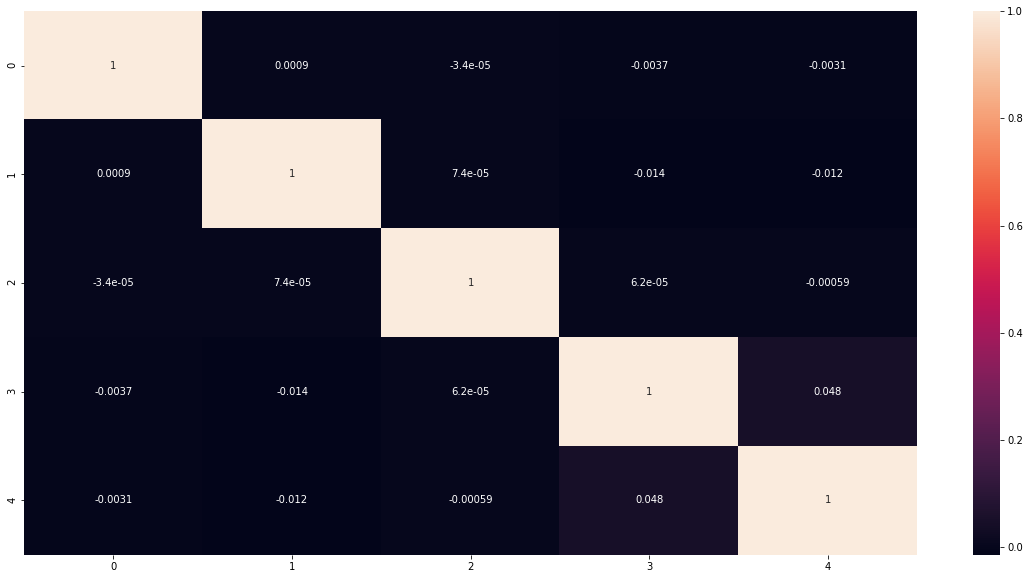

In [23]:
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)
plt.show()


In [24]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4]})


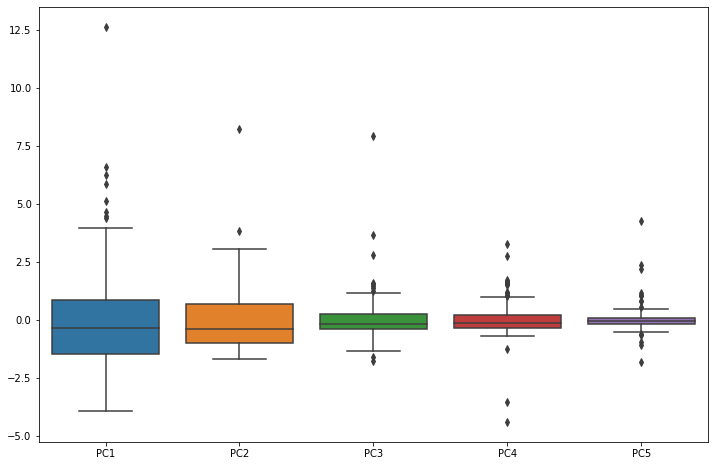

In [25]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=pcs_df2)
plt.show()


In [26]:
pcs_df2.shape


(167, 5)

In [27]:
pcs_df2.head()


,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087


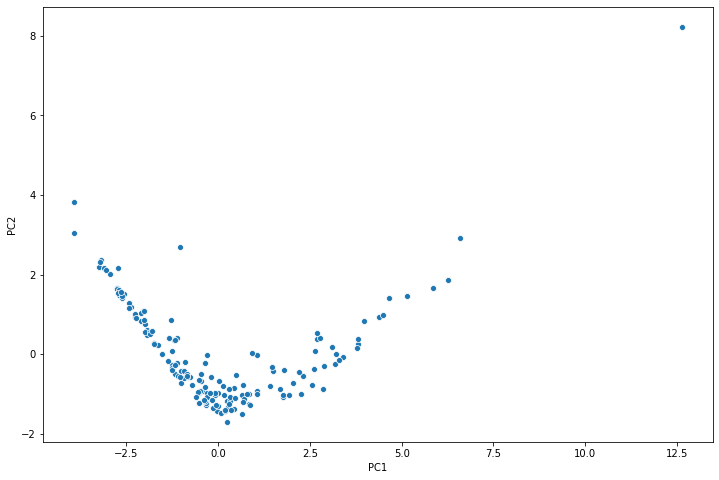

In [28]:
#Visualising the points on the PCs.
# one of the prime advatanges of PCA is that you can visualise high dimensional data
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)
plt.show()


In [29]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H


In [30]:
pcs_df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     167 non-null    float64
 1   PC2     167 non-null    float64
 2   PC3     167 non-null    float64
 3   PC4     167 non-null    float64
 4   PC5     167 non-null    float64
dtypes: float64(5)
memory usage: 6.6 KB


In [31]:
hopkins(pcs_df2)


0.9236178474348522

In [32]:
pcs_df2.shape


(167, 5)

In [33]:
dat3_1 = pcs_df2


In [34]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3_1)
    sse_.append([k, silhouette_score(dat3_1, kmeans.labels_)])


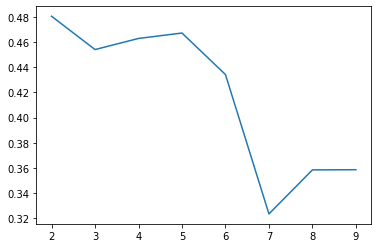

In [35]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.show()


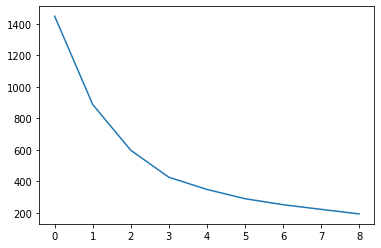

In [36]:
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)
plt.show()


In [37]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dat3_1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(dat3_1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


For n_clusters=2, the silhouette score is 0.48066046782755933
For n_clusters=3, the silhouette score is 0.45415128979715086
For n_clusters=4, the silhouette score is 0.4602201204278895
For n_clusters=5, the silhouette score is 0.4650032850035714
For n_clusters=6, the silhouette score is 0.44359673602855393
For n_clusters=7, the silhouette score is 0.35495412483438127
For n_clusters=8, the silhouette score is 0.3486342976118403


In [38]:
model_clus2 = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
model_clus2.fit(dat3_1)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [39]:
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2','PC3','PC4','PC5','ClusterID']
dat_km


,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,2
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,0
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,0
3,-2.723472,2.174966,0.597397,0.417695,0.056694,2
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,0
...,...,...,...,...,...,...
162,-1.175606,-0.281249,-0.663619,-0.258950,-0.133251,0
163,-0.314505,-0.019143,3.680854,0.016772,-0.475066,0
164,-0.594560,-1.084130,0.528668,-0.478067,-0.373132,0
165,-1.802840,0.584669,1.179551,0.051510,-0.274608,2


In [40]:
dat_km['ClusterID'].value_counts()


0    91
2    48
1    28
Name: ClusterID, dtype: int64

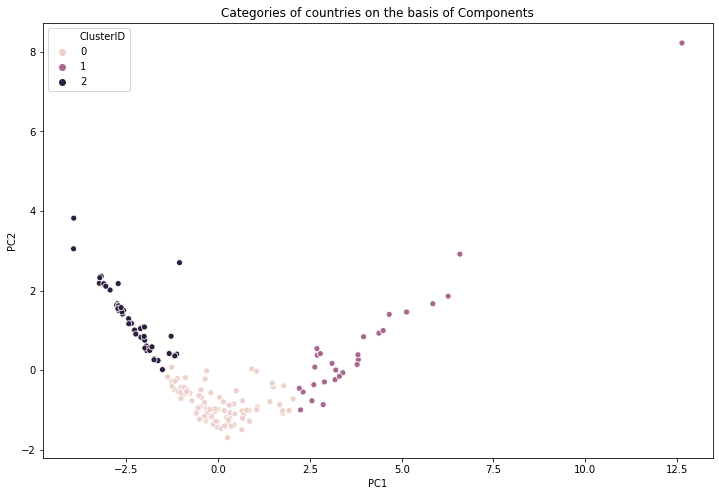

In [41]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

plt.title('Categories of countries on the basis of Components')
plt.show()


In [42]:
dat5=pd.merge(Country_data,dat_km, left_index=True,right_index=True)
dat5.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.636338,1.472260,-0.548330,0.238302,0.061003,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.723472,2.174966,0.597397,0.417695,0.056694,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.649103,-1.026404,-0.258645,-0.276882,0.077087,0


In [43]:
dat6=dat5.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
dat6.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [44]:
dat6.shape


(167, 11)

In [45]:
Cluster_GDPP=pd.DataFrame(dat6.groupby(["ClusterID"]).gdpp.mean())
Cluster_child_mort=pd.DataFrame(dat6.groupby(["ClusterID"]).child_mort.mean())
Cluster_exports=pd.DataFrame(dat6.groupby(["ClusterID"]).exports.mean())
Cluster_income=pd.DataFrame(dat6.groupby(["ClusterID"]).income.mean())
Cluster_health=pd.DataFrame(dat6.groupby(["ClusterID"]).health.mean())
Cluster_imports=pd.DataFrame(dat6.groupby(["ClusterID"]).imports.mean())
Cluster_inflation=pd.DataFrame(dat6.groupby(["ClusterID"]).inflation.mean())
Cluster_life_expec=pd.DataFrame(dat6.groupby(["ClusterID"]).life_expec.mean())
Cluster_total_fer=pd.DataFrame(dat6.groupby(["ClusterID"]).total_fer.mean())


In [46]:
df = pd.concat([Cluster_GDPP,Cluster_child_mort,Cluster_income,Cluster_exports,Cluster_health,
                Cluster_imports,Cluster_inflation,Cluster_life_expec,Cluster_total_fer], axis=1)


In [47]:
df.columns = ["GDPP","child_mort","income","exports","health","imports","inflation","life_expec","total_fer"]
df


,GDPP,child_mort,income,exports,health,imports,inflation,life_expec,total_fer
ClusterID,,,,,,,,,
0,7979.912088,20.357143,13968.021978,3604.149434,547.279455,3710.446386,7.070549,73.460440,2.235055
1,48114.285714,5.046429,50178.571429,31038.239286,4327.163214,25818.100000,3.014679,80.514286,1.760714
2,1909.208333,91.610417,3897.354167,879.063521,114.821765,827.028771,11.911146,59.239583,4.992083


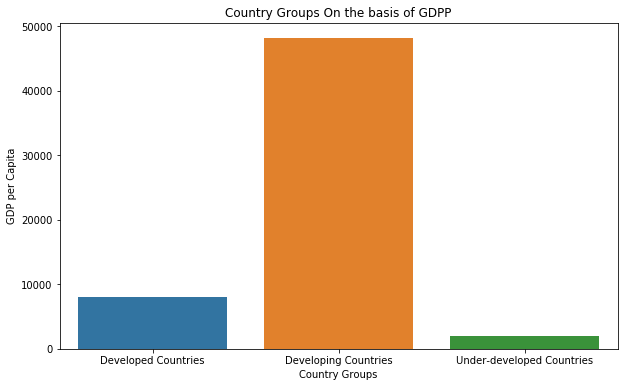

In [48]:
fig = plt.figure(figsize = (10,6))
df.rename(index={0: 'Developed Countries'},inplace=True)
df.rename(index={1: 'Developing Countries'},inplace=True)
df.rename(index={2: 'Under-developed Countries'},inplace=True)
s=sns.barplot(x=df.index,y='GDPP',data=df)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('Country Groups On the basis of GDPP')
plt.show()


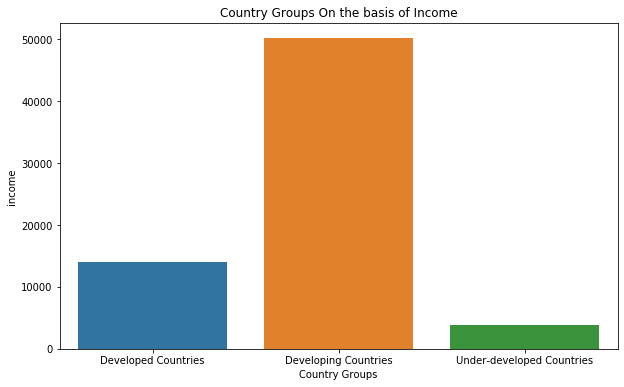

In [49]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x=df.index,y='income',data=df)
plt.xlabel('Country Groups', fontsize=10)
plt.title('Country Groups On the basis of Income')
plt.show()


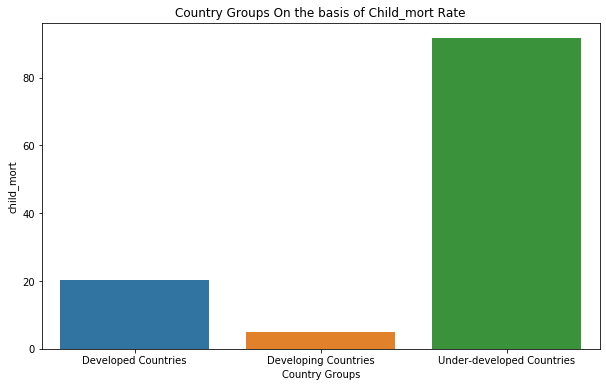

In [50]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x=df.index,y='child_mort',data=df)
plt.xlabel('Country Groups', fontsize=10)
plt.title('Country Groups On the basis of Child_mort Rate')
plt.show()


In [51]:
#Let's use the concept of binning
fin=Country_data[Country_data['gdpp']<=1909]
fin=fin[fin['child_mort']>= 92]
fin=fin[fin['income']<= 3897.35]


In [52]:
fin_k=pd.merge(fin,dat_km,left_index=True,right_index=True)


In [53]:
fin_k=fin_k.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)


In [54]:
fin_k.shape


(17, 11)

In [55]:
fin_k_GDPP=fin_k.nsmallest(8,'gdpp')
fin_k_GDPP


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,2
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.97,55.6,5.05,547,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.81,57.9,5.87,575,2


In [56]:
fin_k_income=fin_k.nsmallest(8,'income')
fin_k_income


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,2
63,Guinea,109.0,196.3440,31.9464,279.936,1190,16.10,58.0,5.34,648,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,2
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.97,55.6,5.05,547,2


In [57]:
fin_k_mort=fin_k.nlargest(8,'child_mort')
fin_k_mort


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,2
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,2
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,2
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,2
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,2
112,Niger,123.0,77.256,17.9568,170.868,814,2.55,58.8,7.49,348,2
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.81,57.9,5.87,575,2
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609,20.80,57.5,6.54,334,2


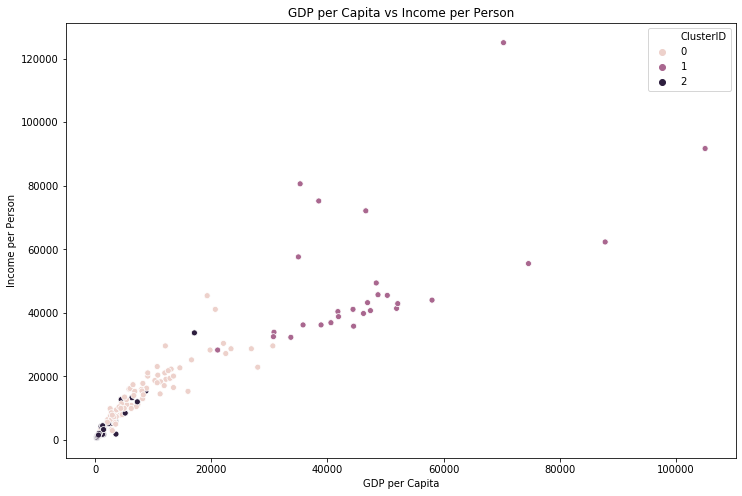

In [58]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='gdpp',y='income',hue='ClusterID',legend='full',data=dat6)
plt.xlabel('GDP per Capita', fontsize=10)
plt.ylabel('Income per Person', fontsize=10)
plt.title('GDP per Capita vs Income per Person')
plt.show()


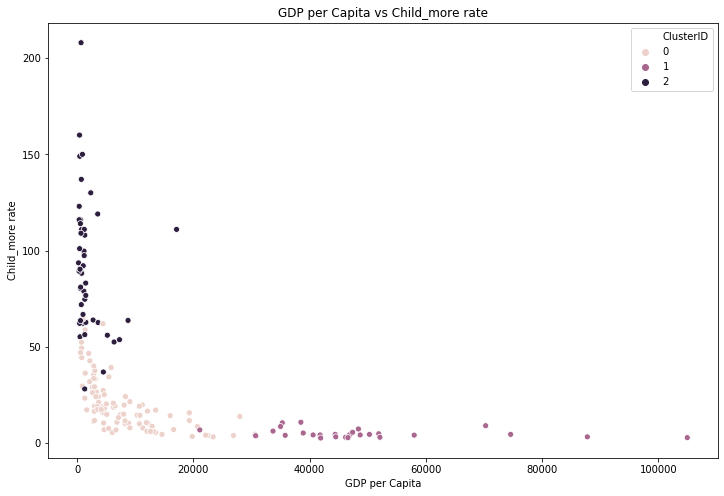

In [59]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='gdpp',y='child_mort',hue='ClusterID',legend='full',data=dat6)
plt.xlabel('GDP per Capita', fontsize=10)
plt.ylabel('Child_more rate', fontsize=10)
plt.title('GDP per Capita vs Child_more rate')
plt.show()


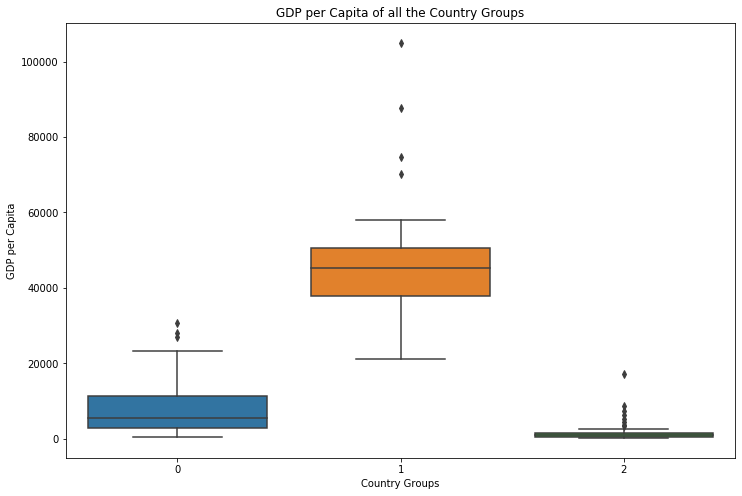

In [60]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(x='ClusterID',y='gdpp',data=dat6)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('GDP per Capita of all the Country Groups')
plt.show()


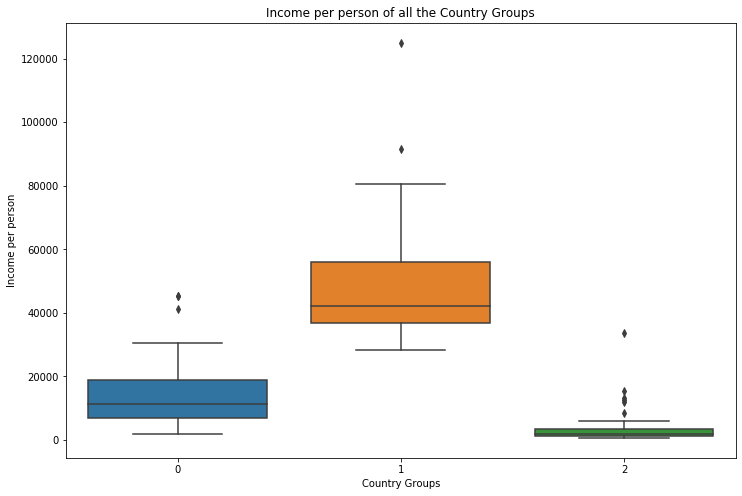

In [61]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(x='ClusterID',y='income',data=dat6)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('Income per person', fontsize=10)
plt.title('Income per person of all the Country Groups')
plt.show()


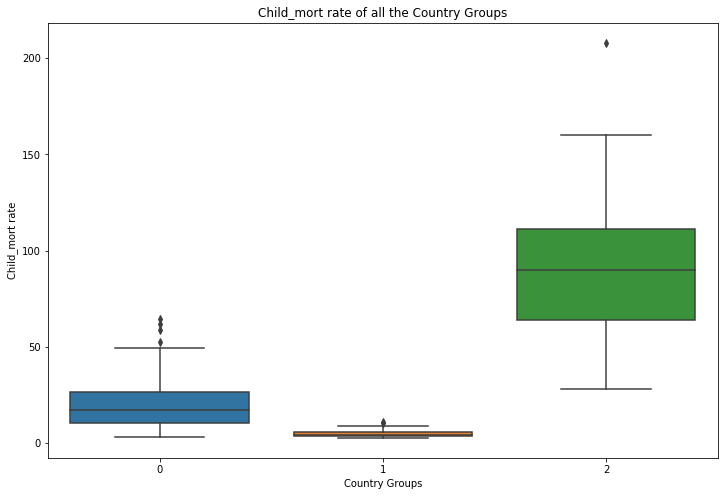

In [62]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(x='ClusterID',y='child_mort',data=dat6)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('Child_mort rate', fontsize=10)
plt.title('Child_mort rate of all the Country Groups')
plt.show()


In [63]:
Developed_con_K=dat6[dat6['ClusterID']==0]
Avg_Developed_con_K=dat6[dat6['ClusterID']==1]
Poor_con_K=dat6[dat6['ClusterID']==2]


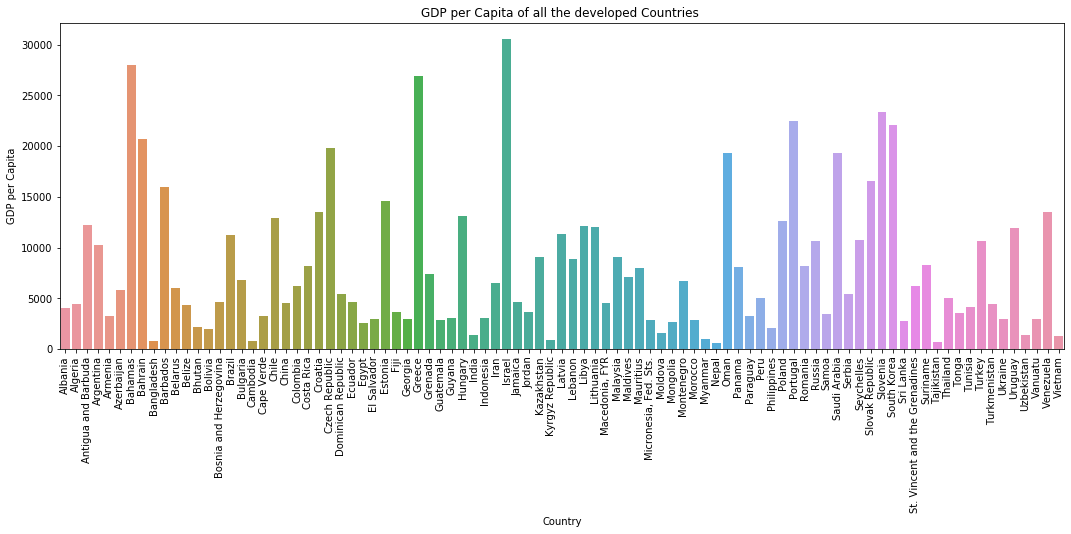

In [64]:
fig = plt.figure(figsize = (18,6))
s=sns.barplot(x='country',y='gdpp',data=Developed_con_K)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('GDP per Capita of all the developed Countries ')
plt.show()


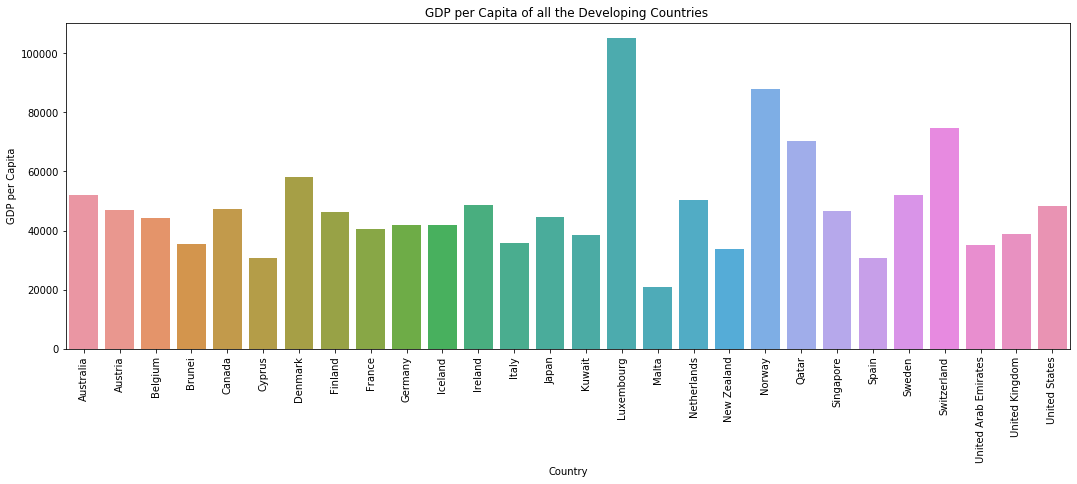

In [65]:
fig = plt.figure(figsize = (18,6))
s=sns.barplot(x='country',y='gdpp',data=Avg_Developed_con_K)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('GDP per Capita of all the Developing Countries ')
plt.show()


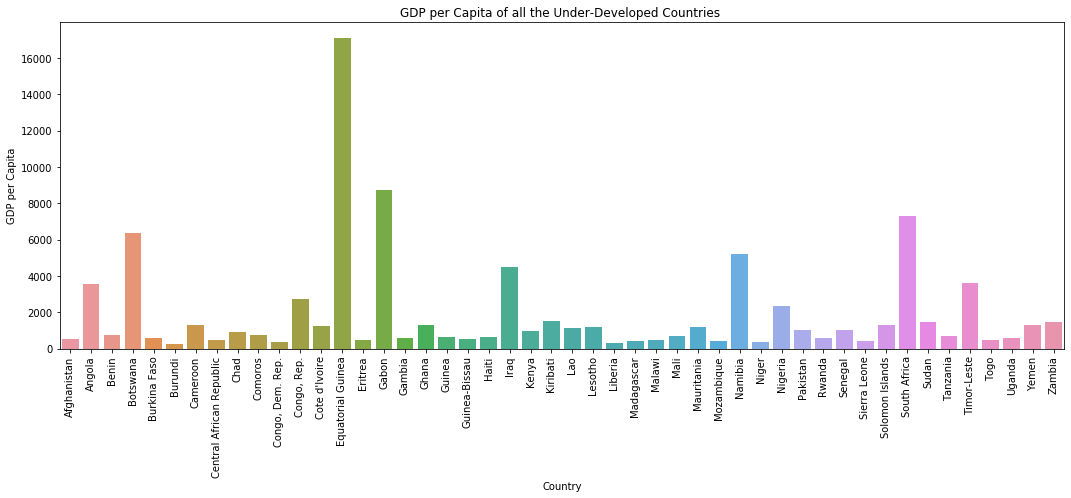

In [66]:
fig = plt.figure(figsize = (18,6))
s=sns.barplot(x='country',y='gdpp',data=Poor_con_K)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('GDP per Capita of all the Under-Developed Countries ')
plt.show()


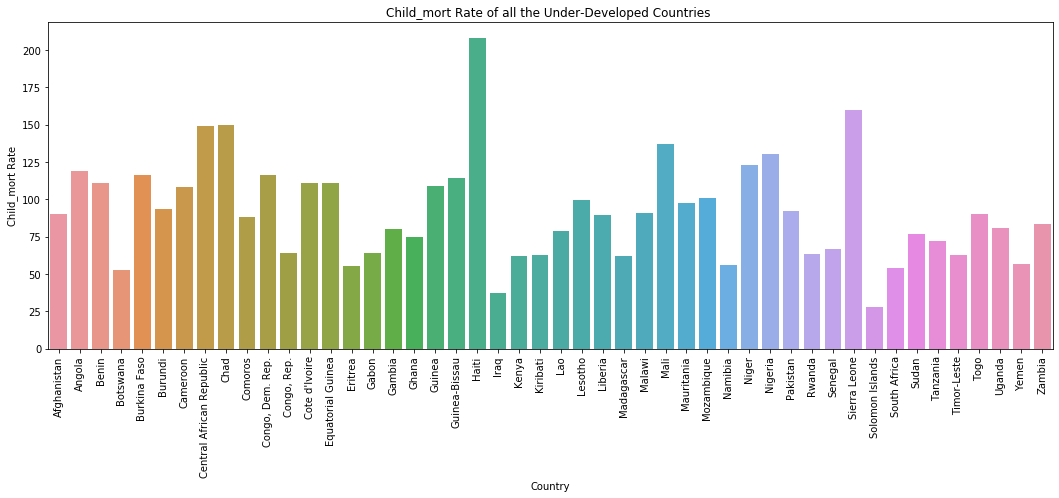

In [67]:
fig = plt.figure(figsize = (18,6))
s=sns.barplot(x='country',y='child_mort',data=Poor_con_K)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('Child_mort Rate', fontsize=10)
plt.title('Child_mort Rate of all the Under-Developed Countries ')
plt.show()


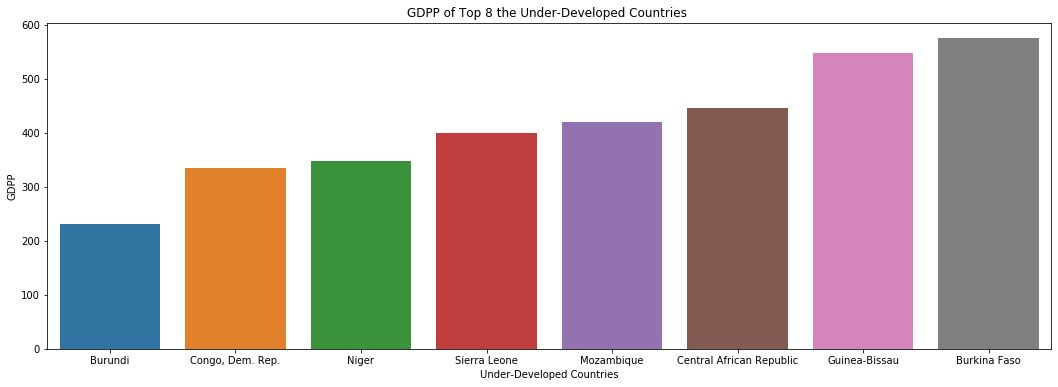

In [68]:
fig = plt.figure(figsize = (18,6))
sns.barplot(x='country',y='gdpp',data=fin_k_GDPP)
plt.title('GDPP of Top 8 the Under-Developed Countries ')
plt.xlabel('Under-Developed Countries', fontsize=10)
plt.ylabel('GDPP', fontsize=10)
plt.show()


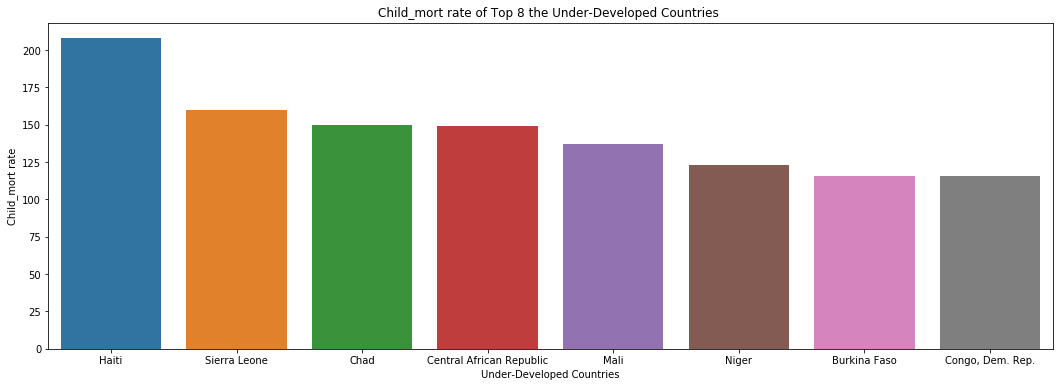

In [69]:
fig = plt.figure(figsize = (18,6))
sns.barplot(x='country',y='child_mort',data=fin_k_mort)
plt.title('Child_mort rate of Top 8 the Under-Developed Countries ')
plt.xlabel('Under-Developed Countries', fontsize=10)
plt.ylabel('Child_mort rate', fontsize=10)
plt.show()


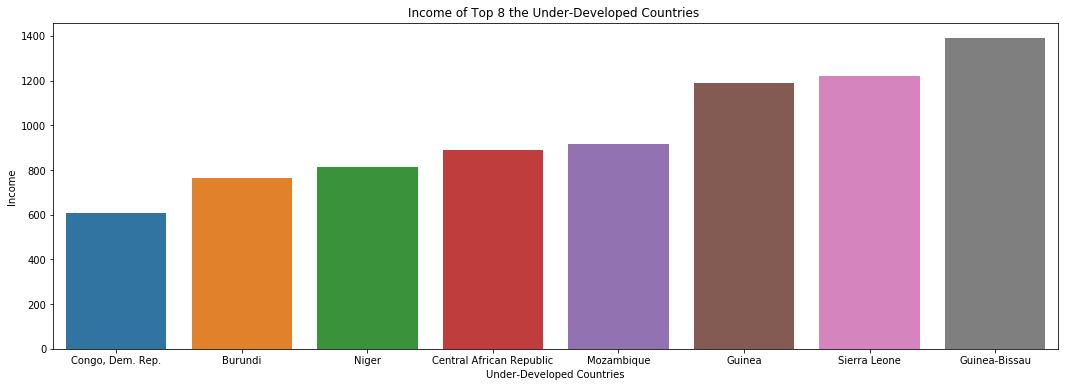

In [70]:
fig = plt.figure(figsize = (18,6))
sns.barplot(x='country',y='income',data=fin_k_income)
plt.title('Income of Top 8 the Under-Developed Countries ')
plt.xlabel('Under-Developed Countries', fontsize=10)
plt.ylabel('Income', fontsize=10)
plt.show()


In [71]:
pcs_df2.shape


(167, 5)

In [72]:
pcs_df3 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4]})


In [73]:
dat_km.head()


,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,2
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,0
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,0
3,-2.723472,2.174966,0.597397,0.417695,0.056694,2
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,0


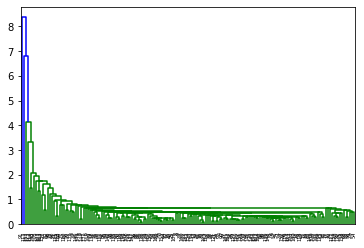

In [74]:
mergings=linkage(pcs_df2,method='single',metric='euclidean')
dendrogram(mergings)
plt.show()


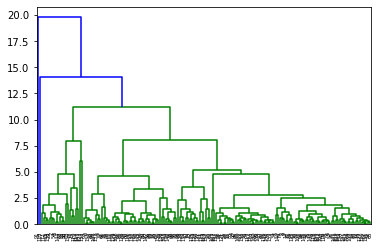

In [75]:
#mergings=linkage(fin,method='complete',metric='euclidean')
mergings=linkage(pcs_df2,method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()


In [76]:
cut_tree(mergings,n_clusters=3).shape


(167, 1)

In [77]:
cluser_labels=cut_tree(mergings,n_clusters=3).reshape(-1,)
cluser_labels


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [78]:
#assign cluster labels

dat_km['Cluster_lables']=cluser_labels
dat_km.head()


,PC1,PC2,PC3,PC4,PC5,ClusterID,Cluster_lables
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,2,0
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,0,0
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,0,0
3,-2.723472,2.174966,0.597397,0.417695,0.056694,2,0
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,0,0


In [79]:
dat7=pd.merge(Country_data,dat_km, left_index=True,right_index=True)
dat7.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID,Cluster_lables
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.636338,1.472260,-0.548330,0.238302,0.061003,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.723472,2.174966,0.597397,0.417695,0.056694,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.649103,-1.026404,-0.258645,-0.276882,0.077087,0,0


In [80]:
dat8=dat7.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
dat8.shape


(167, 12)

In [81]:
dat8.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,Cluster_lables
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0


In [82]:
Cluster_GDPP_H=pd.DataFrame(dat8.groupby(["Cluster_lables"]).gdpp.mean())
Cluster_child_mort_H=pd.DataFrame(dat8.groupby(["Cluster_lables"]).child_mort.mean())
Cluster_income_H=pd.DataFrame(dat8.groupby(["Cluster_lables"]).income.mean())


In [83]:
df_H = pd.concat([Cluster_GDPP_H,Cluster_child_mort_H,Cluster_income_H], axis=1)


In [84]:
df_H.columns = ["GDPP","child_mort","income"]
df_H


,GDPP,child_mort,income
Cluster_lables,,,
0,12470.812121,37.929091,16765.533333
1,105000.000000,2.800000,91700.000000
2,2330.000000,130.000000,5150.000000


In [85]:
#Let's use the concept of binning
fin_H=Country_data[Country_data['gdpp']<=2330.000000]
fin_H=fin[fin['child_mort']>= 130.000000]
fin_H=fin[fin['income']<= 5150.000000]


In [86]:
fin_H=pd.merge(fin_H,dat_km,left_index=True,right_index=True)


In [87]:
fin_H=fin_H.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
fin_H.shape


(17, 12)

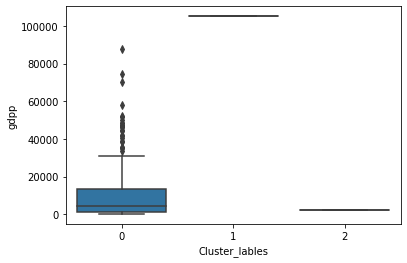

In [88]:
sns.boxplot(x='Cluster_lables',y='gdpp',data=dat8)
plt.show()


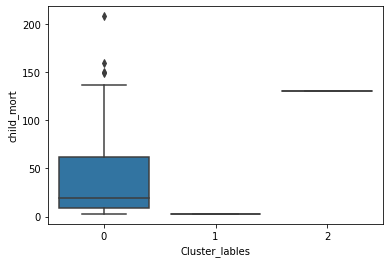

In [89]:
sns.boxplot(x='Cluster_lables',y='child_mort',data=dat8)
plt.show()


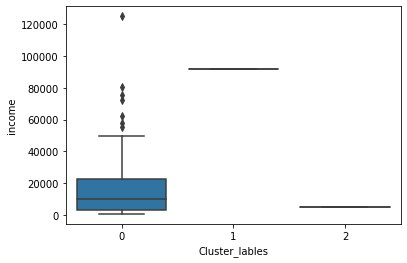

In [90]:
sns.boxplot(x='Cluster_lables',y='income',data=dat8)
plt.show()


In [91]:
fin_H.nsmallest(8,'gdpp')


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,Cluster_lables
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,2,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,2,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,2,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,2,0
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.97,55.6,5.05,547,2,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.81,57.9,5.87,575,2,0
